In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(7).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.236, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-7 in yolov8:: 100%|██████████| 7460/7460 [00:01<00:00, 6494.52it/s]


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 316MB/s] 


# **COPY DATASET IN A NEW DIRECTORY**

In [6]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-7 datasets/sixray100-1

# **TRAIN MODEL**

In [7]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=50, imgsz=640, batch=16,project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]
2024-01-07 14:07:41,541	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-07 14:07:42,496	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/train/labels... 2841 images, 4 backgrounds, 0 corrupt: 100%|██████████| 2841/2841 [00:02<00:00, 1210.23it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/weapon_detection-7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 14, len(boxes) = 7064. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<00:00, 1359.68it/s]

val: New cache created: /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.4G      1.252      1.799      1.485         32        640: 100%|██████████| 178/178 [03:30<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:16<00:00,  1.15it/s]

                   all        587       1503      0.419      0.213      0.208      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        14G      1.358      1.629      1.591         22        640: 100%|██████████| 178/178 [03:33<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503       0.45      0.261      0.236      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        14G      1.355      1.613      1.599         21        640: 100%|██████████| 178/178 [03:32<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.30it/s]

                   all        587       1503      0.459      0.237      0.235      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        14G      1.295      1.476      1.556         28        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.29it/s]

                   all        587       1503      0.617      0.393      0.422      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        14G      1.239      1.373       1.51         31        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.824      0.404       0.46      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        14G      1.215      1.286      1.505         44        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.30it/s]

                   all        587       1503      0.793      0.421      0.482      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        14G      1.158      1.232      1.463         47        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.844      0.429      0.497      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        14G       1.12      1.172      1.426         38        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.782      0.465      0.494      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        14G      1.085      1.105      1.397         49        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.878      0.461      0.557      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        14G       1.07      1.061      1.385         55        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.901      0.456      0.554      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        14G      1.058      1.035      1.387         32        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503       0.86      0.514      0.571      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        14G      1.024     0.9974       1.36         42        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.671      0.601      0.602      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        14G      1.011     0.9483      1.344         57        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.909      0.529      0.598      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        14G     0.9908     0.9285      1.334         32        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.782      0.573      0.648      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.9G     0.9745     0.8945      1.317         50        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.763      0.586       0.63       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.9G     0.9525     0.8607      1.293         42        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.732      0.552      0.609      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        14G     0.9372     0.8267      1.271         36        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.782      0.586      0.639      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        14G     0.9357     0.8351      1.281         38        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.875      0.632      0.677      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        14G     0.9233     0.8171      1.275         34        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.888      0.626      0.674      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        14G     0.9102     0.7842      1.264         28        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.804      0.565      0.642      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        14G     0.9014     0.7762      1.258         44        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.887      0.584      0.681      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        14G     0.8908     0.7625      1.243         26        640: 100%|██████████| 178/178 [03:30<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.30it/s]

                   all        587       1503       0.88      0.605      0.695       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        14G      0.876     0.7363      1.238         43        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.771      0.643      0.666      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        14G     0.8794     0.7516      1.237         53        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.858      0.628      0.698      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        14G     0.8645     0.7129      1.232         37        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.858      0.654      0.729      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        14G     0.8486     0.6833      1.205         74        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.939      0.661      0.725      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        14G     0.8383     0.6828      1.213         47        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.925      0.665      0.722      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        14G     0.8224      0.665      1.194         32        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.734      0.666      0.719      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        14G     0.8144     0.6532      1.198         52        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.832      0.685      0.706      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50        14G     0.8168     0.6517      1.184         37        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.717      0.679      0.731       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        14G     0.7908     0.6171      1.177         54        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.30it/s]

                   all        587       1503       0.91      0.664      0.731      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        14G     0.7897     0.6194      1.169         39        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.924       0.69      0.735      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        14G     0.7923     0.6123      1.174         43        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.911      0.672      0.723      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        14G     0.7811     0.6063       1.17         47        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.702      0.749      0.768       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.9G     0.7734     0.6018      1.162         40        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503       0.72      0.701      0.739      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        14G     0.7625     0.5799      1.146         46        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.738      0.722      0.759      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        14G      0.758     0.5726      1.148         53        640: 100%|██████████| 178/178 [03:30<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.897      0.712      0.762      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        14G     0.7458      0.561      1.147         65        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503       0.92      0.697      0.754      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      13.9G     0.7298      0.536      1.136         38        640: 100%|██████████| 178/178 [03:30<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.903      0.707      0.771      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        14G     0.7305     0.5417      1.137         38        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.904      0.709      0.765      0.607


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.9G     0.6471      0.397      1.098         22        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.706      0.836      0.832      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.9G     0.6294     0.3848      1.082         25        640: 100%|██████████| 178/178 [03:30<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.935      0.699      0.765      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      13.9G     0.6161     0.3774      1.081         29        640: 100%|██████████| 178/178 [03:30<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.769      0.812      0.794       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        14G      0.602      0.363      1.063         22        640: 100%|██████████| 178/178 [03:30<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.694      0.834      0.776      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        14G     0.5998     0.3586      1.057         22        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.30it/s]

                   all        587       1503      0.905      0.723      0.785       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        14G     0.5821     0.3478      1.046         23        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.922      0.709      0.769      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.9G     0.5734     0.3381       1.04         21        640: 100%|██████████| 178/178 [03:30<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.902      0.711      0.768      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        14G     0.5715     0.3378      1.038         18        640: 100%|██████████| 178/178 [03:31<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.675      0.843      0.789      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.9G     0.5582     0.3262      1.029         28        640: 100%|██████████| 178/178 [03:30<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.32it/s]

                   all        587       1503      0.807      0.818      0.815      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        14G     0.5503     0.3187      1.023         24        640: 100%|██████████| 178/178 [03:30<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:14<00:00,  1.31it/s]

                   all        587       1503      0.856      0.816      0.839      0.692



50 epochs completed in 3.189 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 136.7MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 136.7MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68129346 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:16<00:00,  1.16it/s]


                   all        587       1503      0.856      0.815      0.839      0.692
                   Gun        587        739      0.964       0.98      0.991      0.849
                Hammer        587          2      0.751        0.5      0.586      0.527
                 Knife        587        429      0.938      0.918      0.953      0.751
                Pliers        587        118      0.957      0.932      0.952      0.769
              Scissors        587         24      0.619      0.677      0.629      0.479
                Wrench        587        191      0.906      0.885      0.921      0.777
Speed: 0.4ms preprocess, 21.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf5daa7ebc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# **VAIDATE MODEL**

In [8]:
# Load a model
# model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68129346 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:32<00:00,  1.13it/s]


                   all        587       1503      0.806      0.824      0.843      0.696
                   Gun        587        739      0.956      0.984      0.991      0.849
                Hammer        587          2      0.505        0.5       0.62      0.558
                 Knife        587        429       0.91      0.928      0.953      0.749
                Pliers        587        118      0.938      0.932      0.951      0.768
              Scissors        587         24      0.629      0.706      0.623      0.473
                Wrench        587        191      0.898      0.895      0.921      0.776
Speed: 0.4ms preprocess, 50.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


array([    0.84918,       0.558,     0.74902,     0.76794,     0.47335,     0.77629])

# **TESTING MODEL**


image 1/296 /kaggle/working/weapon_detection-7/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Wrench, 88.6ms
image 2/296 /kaggle/working/weapon_detection-7/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 67.1ms
image 3/296 /kaggle/working/weapon_detection-7/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 102.2ms
image 4/296 /kaggle/working/weapon_detection-7/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 1 Scissors, 36.2ms
image 5/296 /kaggle/working/weapon_detection-7/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 35.7ms
image 6/296 /kaggle/working/weapon_detection-7/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 35.9ms
image 7/296 /kaggle/working/weapon_detection-7/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 34.8ms
image 8/296 /kaggle/

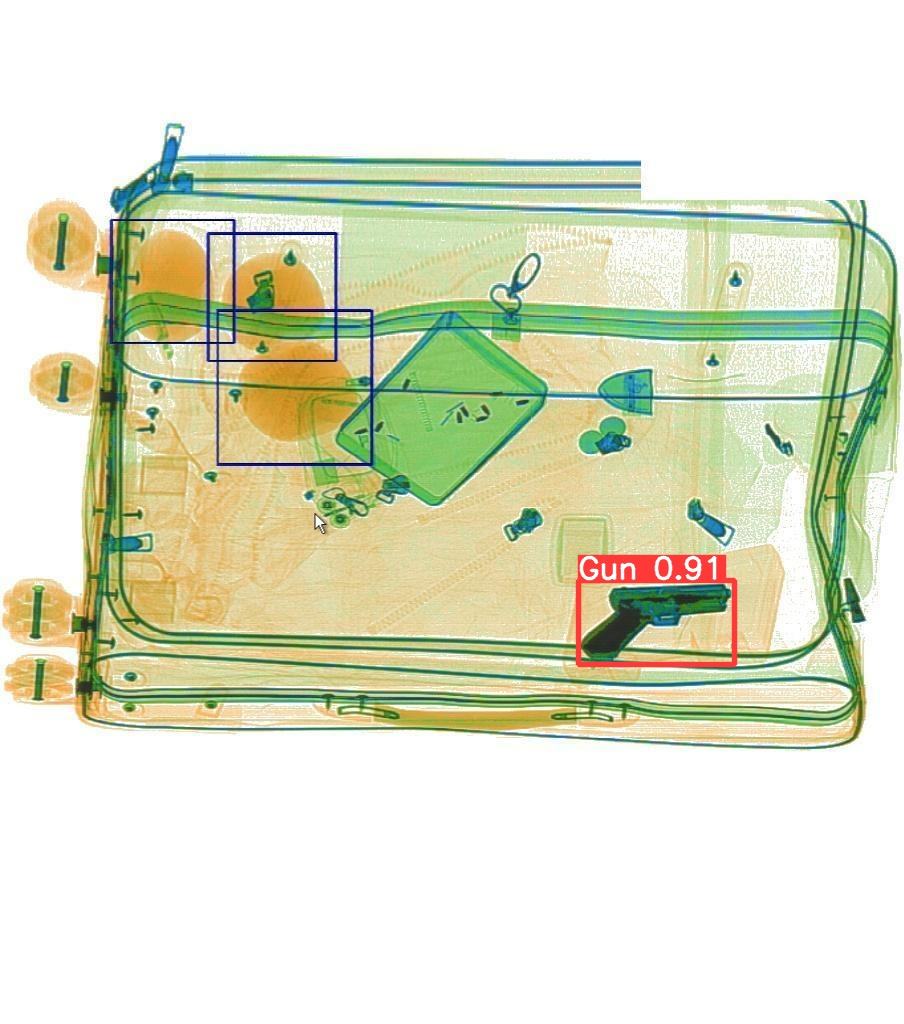

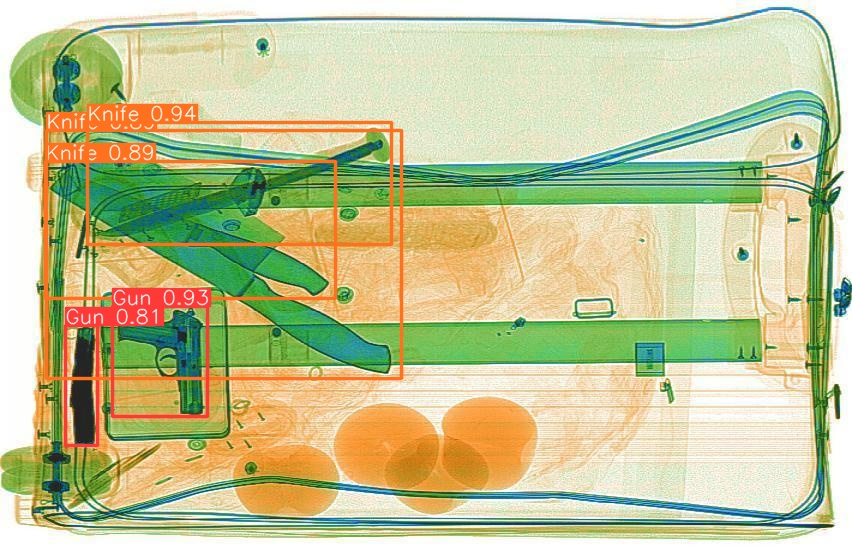

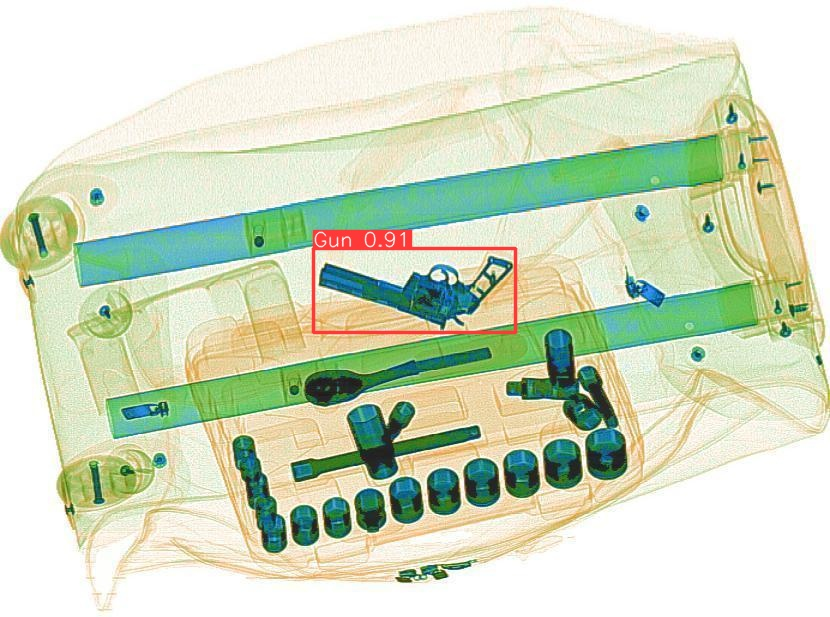

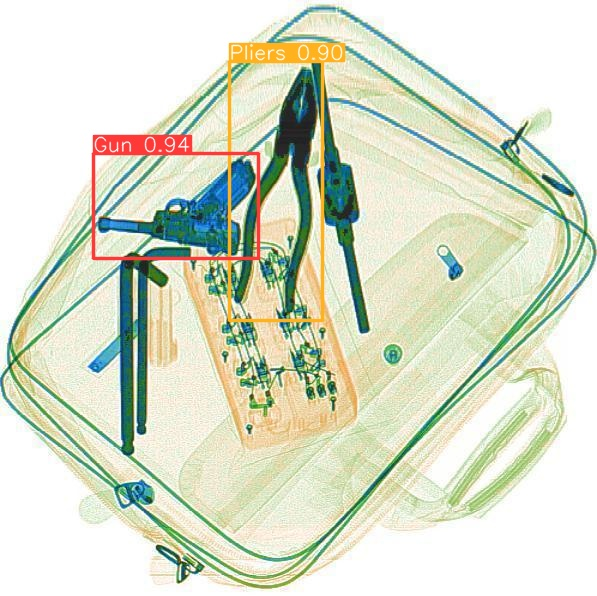

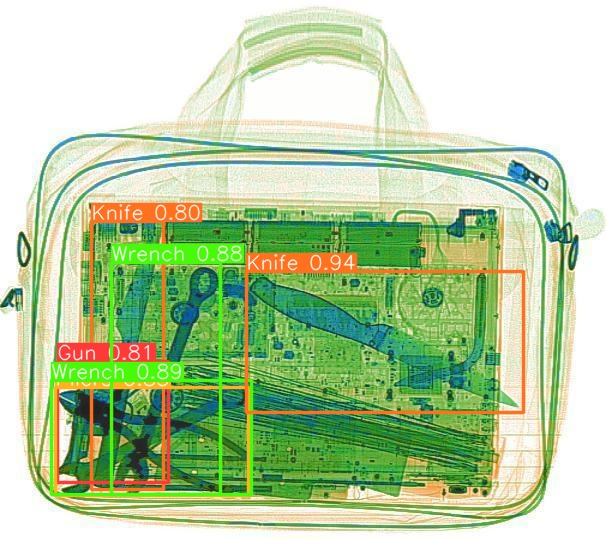

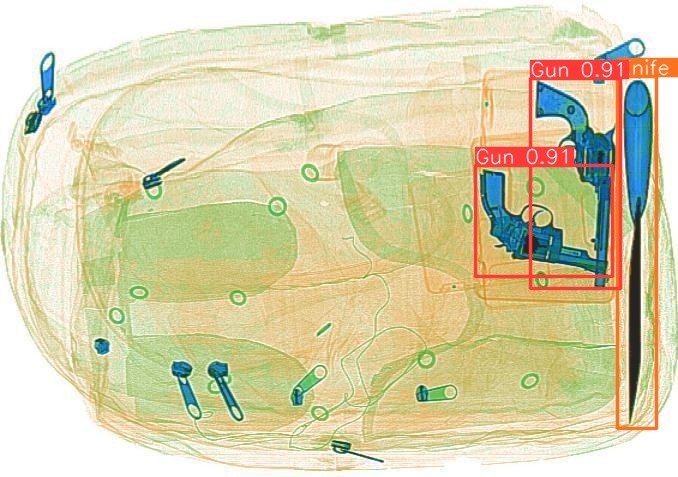

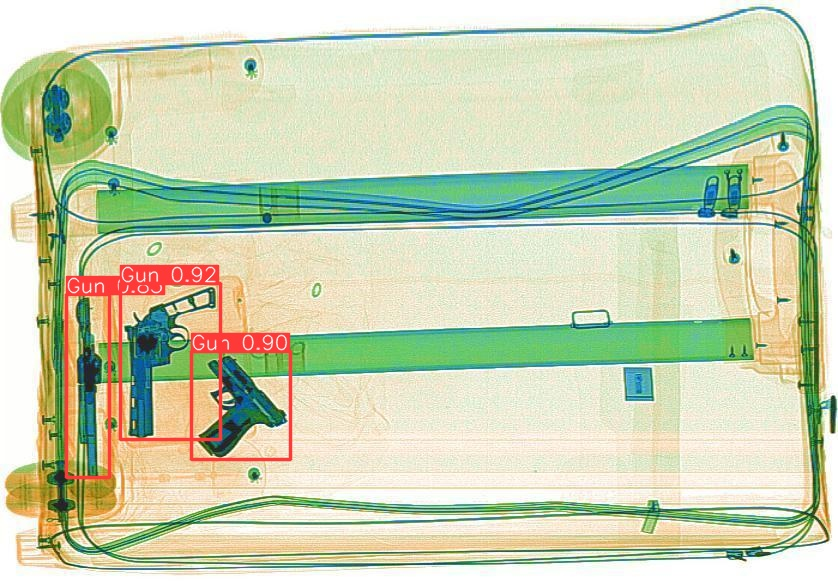

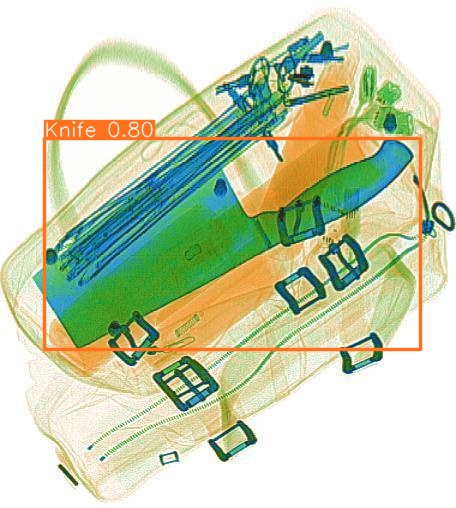

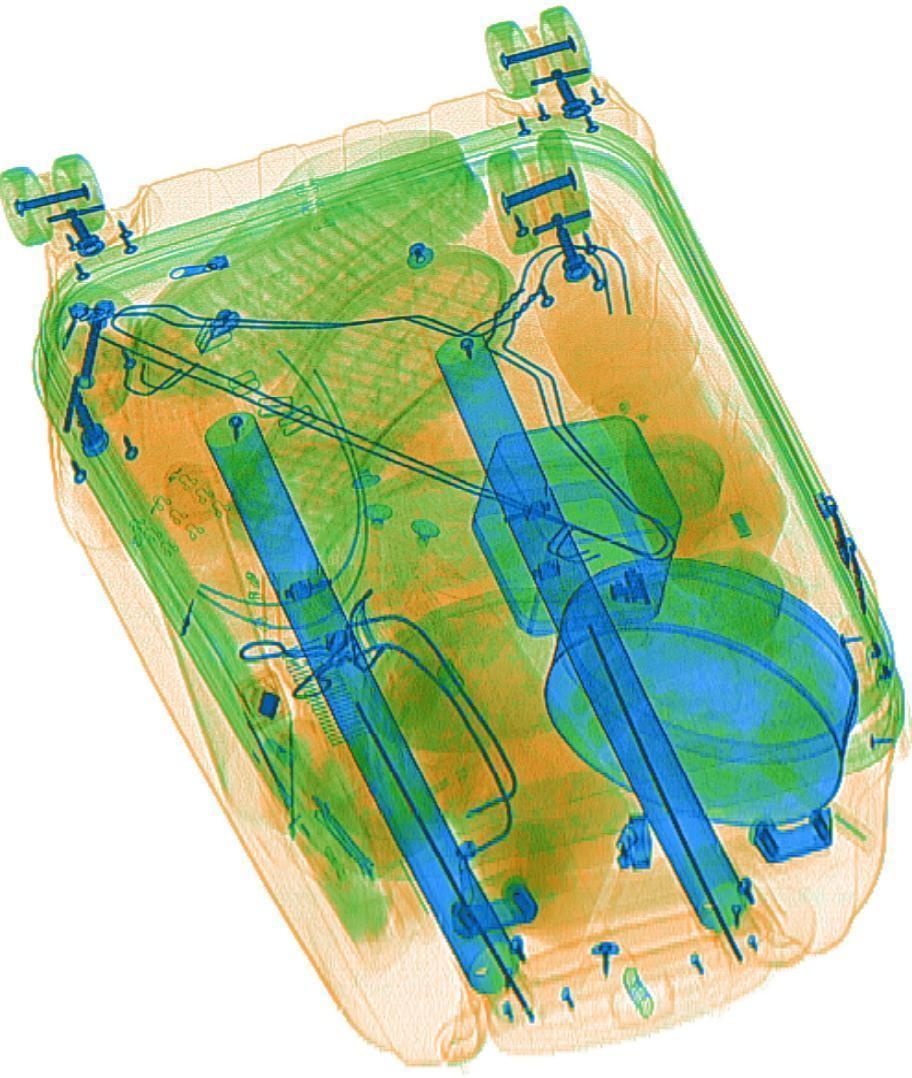

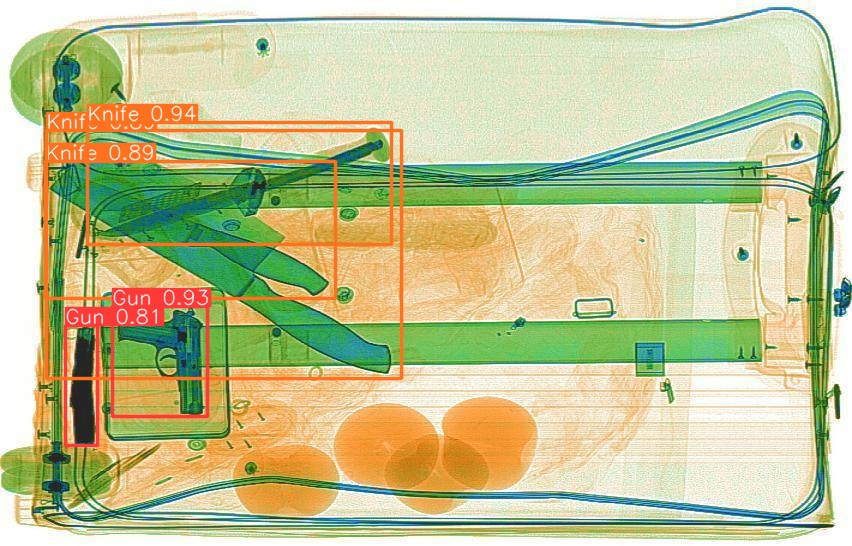

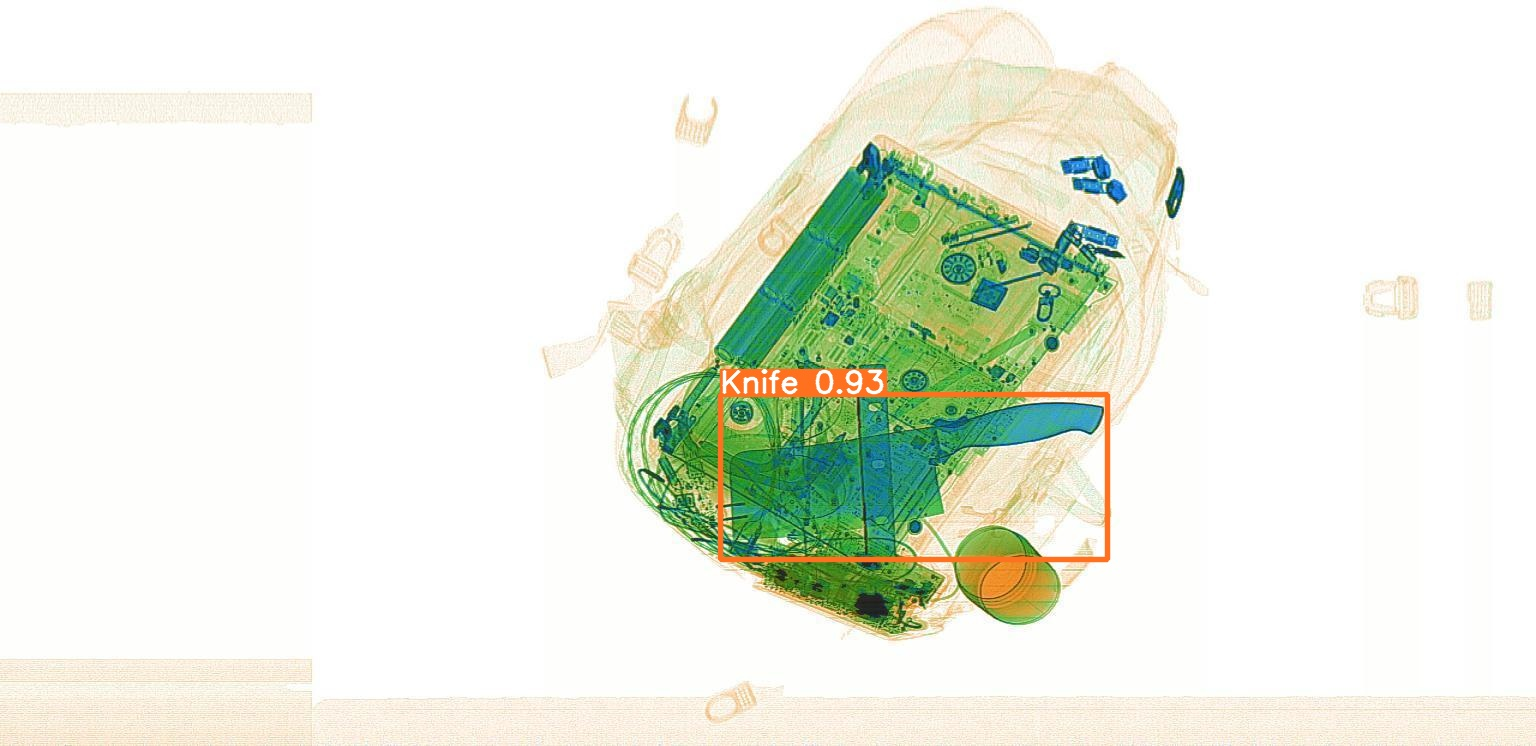

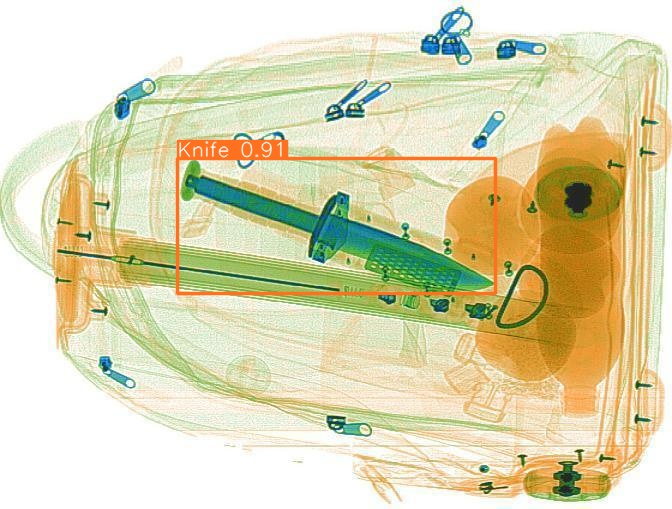

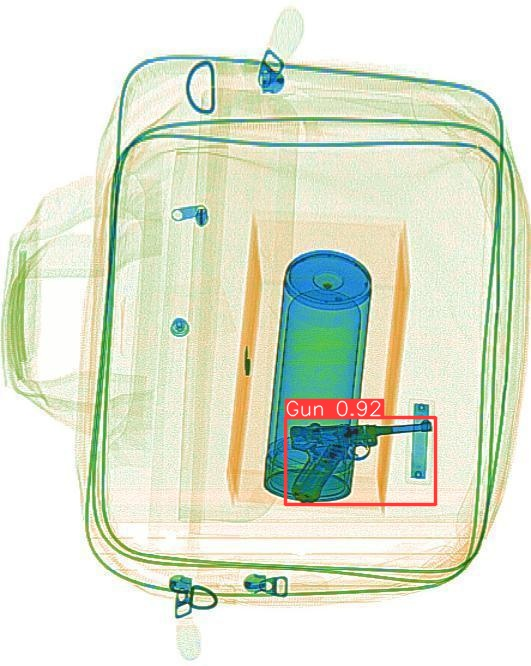

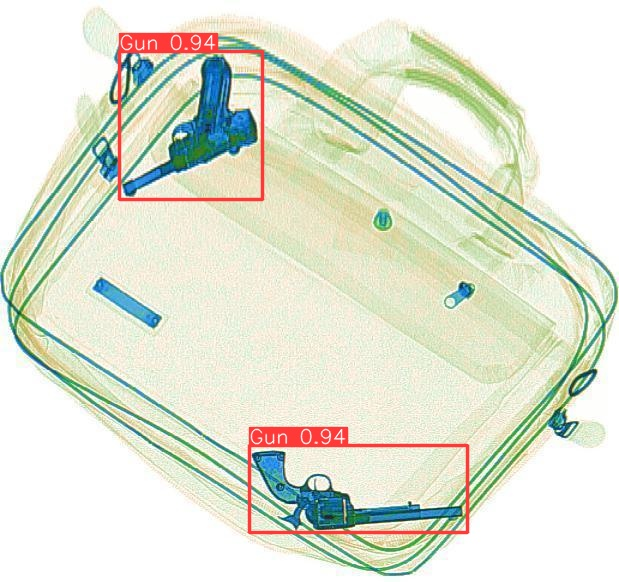

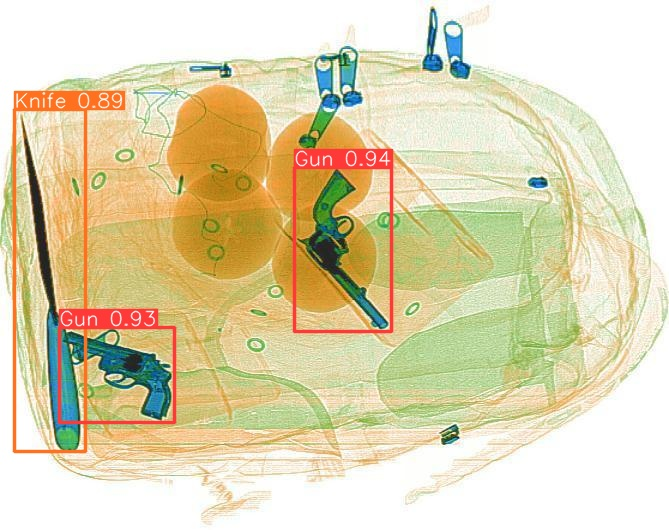

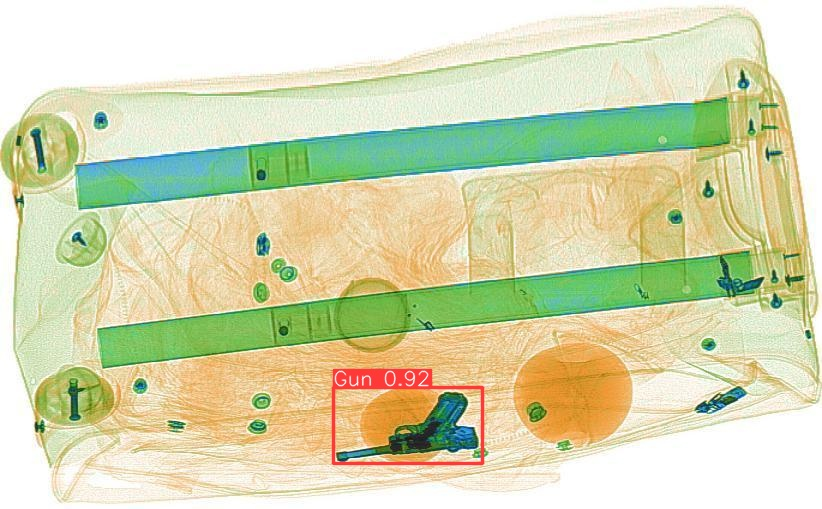

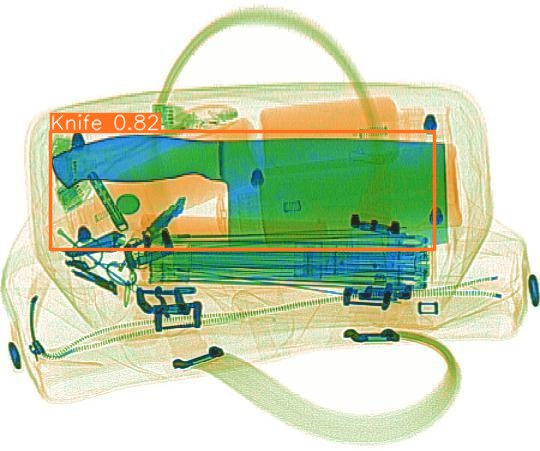

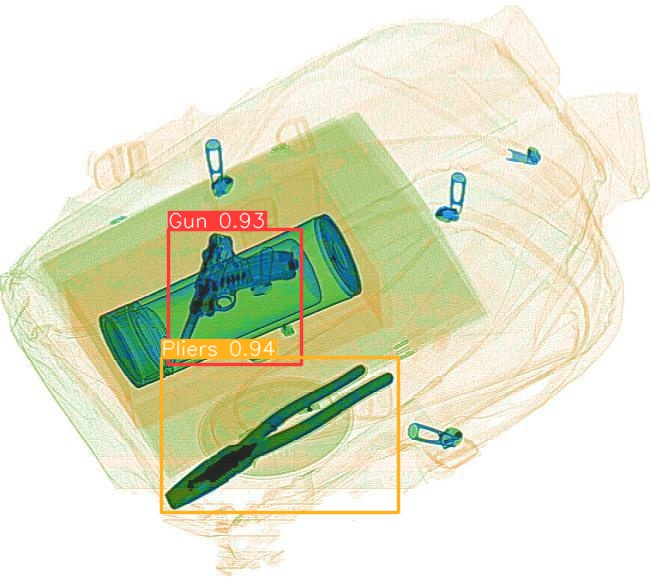

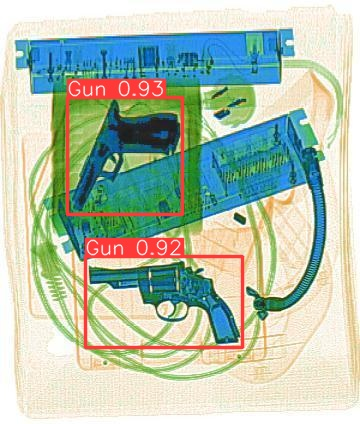

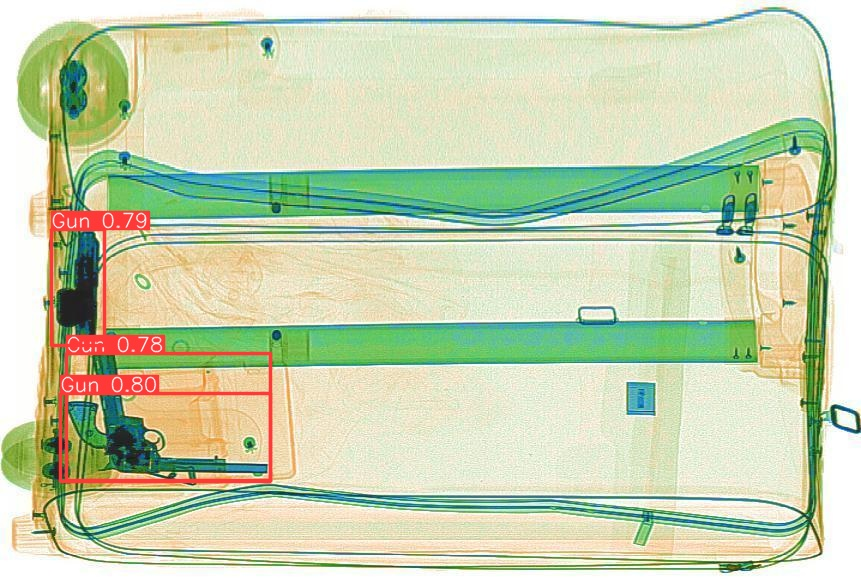

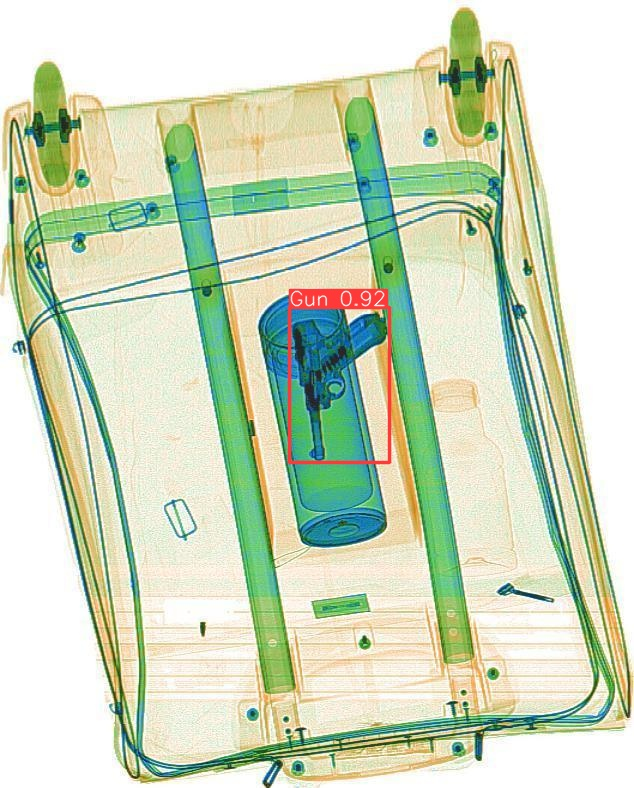

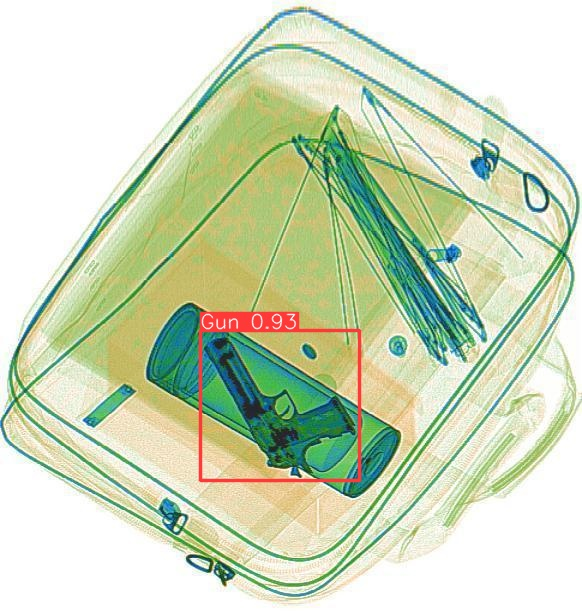

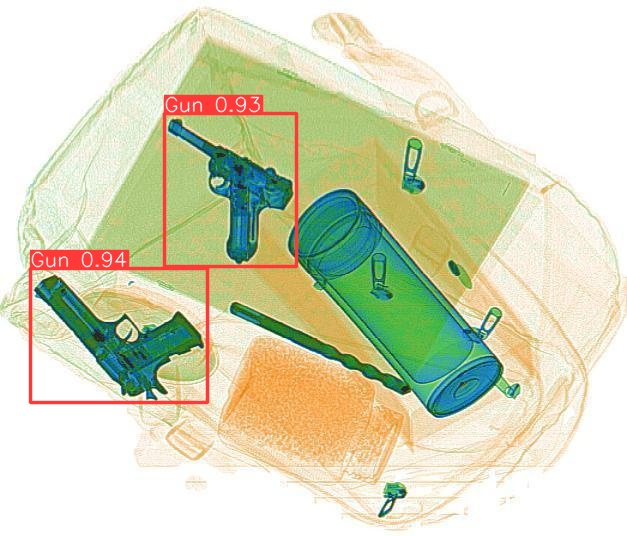

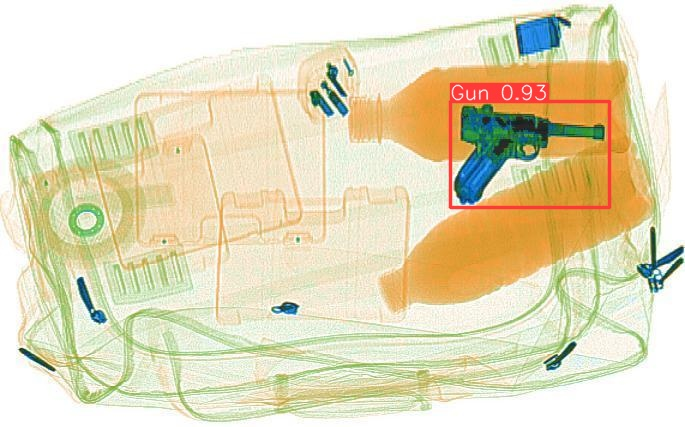

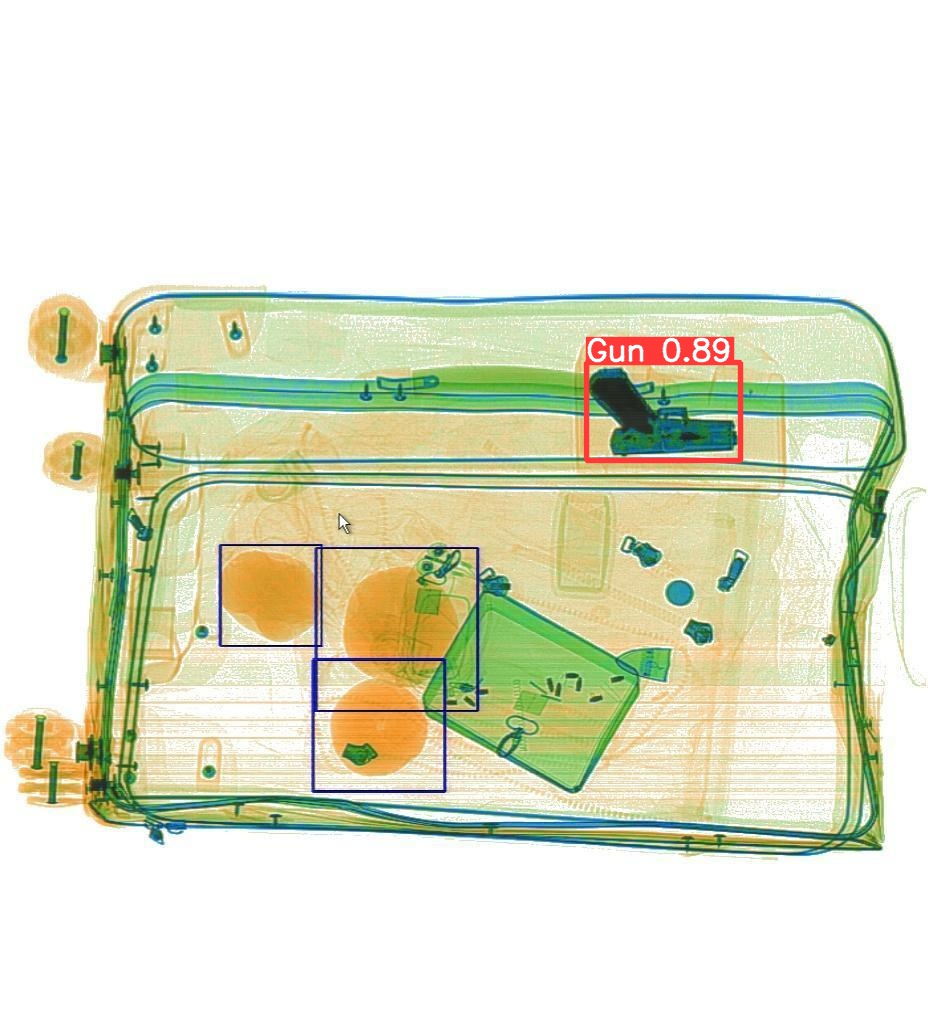

In [9]:
yolo8_model_detection=YOLO('YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-7/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [10]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5314.0/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (1755.87s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅      130.4               0.6940                   57.81
1             TorchScript       ✅      260.5               0.6913                   60.97
2                    ONNX       ✅      260.1               0.6913                   66.22
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎      365.7                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅      650.4               0.6913                   79.57
7     TensorFlow GraphDef       ✅      260.2               0.6913                   89.61
8         TensorFlow 

Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅      130.4               0.6940                   57.81
1             TorchScript       ✅      260.5               0.6913                   60.97
2                    ONNX       ✅      260.1               0.6913                   66.22
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎      365.7                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅      650.4               0.6913                   79.57
7     TensorFlow GraphDef       ✅      260.2               0.6913                   89.61
8         TensorFlow Lite       ❌        0.0                  NaN                     NaN
9     TensorFlow Edge TPU       ❌        0.0                  NaN                     NaN
10          TensorFlow.js       ❌        0.0                  NaN                     NaN
11           PaddlePaddle       ✅      520.3               0.6913                 1621.47
12                   ncnn       ❌        0.0                  NaN                     NaN